# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

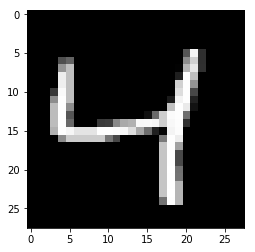

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6951
Epoch: 1/20... Training loss: 0.6924
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6811
Epoch: 1/20... Training loss: 0.6770
Epoch: 1/20... Training loss: 0.6720
Epoch: 1/20... Training loss: 0.6657
Epoch: 1/20... Training loss: 0.6586
Epoch: 1/20... Training loss: 0.6507
Epoch: 1/20... Training loss: 0.6413
Epoch: 1/20... Training loss: 0.6323
Epoch: 1/20... Training loss: 0.6202
Epoch: 1/20... Training loss: 0.6065
Epoch: 1/20... Training loss: 0.5928
Epoch: 1/20... Training loss: 0.5803
Epoch: 1/20... Training loss: 0.5615
Epoch: 1/20... Training loss: 0.5461
Epoch: 1/20... Training loss: 0.5280
Epoch: 1/20... Training loss: 0.5131
Epoch: 1/20... Training loss: 0.4932
Epoch: 1/20... Training loss: 0.4775
Epoch: 1/20... Training loss: 0.4588
Epoch: 1/20... Training loss: 0.4407
Epoch: 1/20... Training loss: 0.4267
Epoch: 1/20... Training loss: 0.4114
E

Epoch: 2/20... Training loss: 0.1780
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1793
Epoch: 2/20... Training loss: 0.1748
Epoch: 2/20... Training loss: 0.1745
Epoch: 2/20... Training loss: 0.1792
Epoch: 2/20... Training loss: 0.1737
Epoch: 2/20... Training loss: 0.1703
Epoch: 2/20... Training loss: 0.1774
Epoch: 2/20... Training loss: 0.1708
Epoch: 2/20... Training loss: 0.1783
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1761
Epoch: 2/20... Training loss: 0.1726
Epoch: 2/20... Training loss: 0.1723
Epoch: 2/20... Training loss: 0.1762
Epoch: 2/20... Training loss: 0.1726
Epoch: 2/20... Training loss: 0.1729
Epoch: 2/20... Training loss: 0.1706
Epoch: 2/20... Training loss: 0.1729
Epoch: 2/20... Training loss: 0.1761
Epoch: 2/20... Training loss: 0.1657
Epoch: 2/20... Training loss: 0.1753
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1717
Epoch: 2/20... Training loss: 0.1687
E

Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1436
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1457
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1443
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1366
E

Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1186
E

Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1097
E

Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1047
E

Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1011
E

Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0960
E

Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0951
E

Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0886
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0906
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0989
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

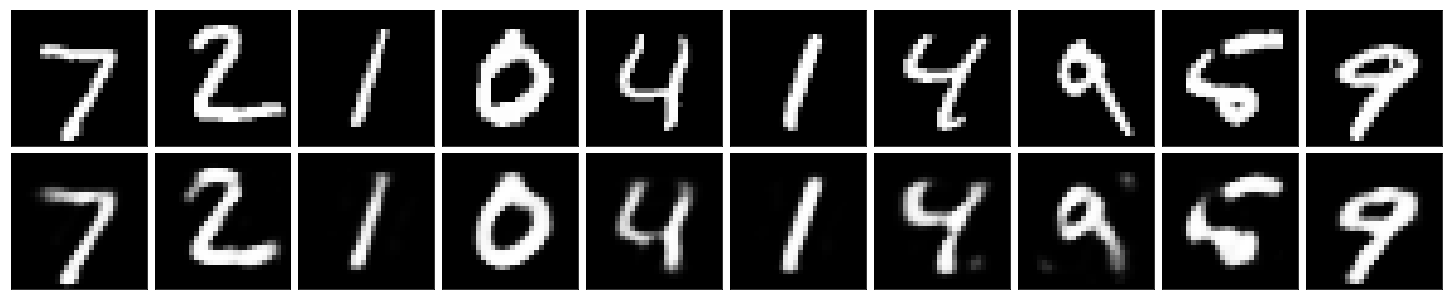

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.